In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import statsmodels
import statistics as stat

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

mses = {}

## Open Apple Stock Data and Delete 5 Dates

In [23]:
aapl = yf.Ticker("AAPL")
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

data = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")

data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327499,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086517,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [24]:
df = data.copy()

In [44]:
df.index = pd.to_datetime(df.index)
random_state=3241
np.random.seed(random_state)

missing_dates = np.random.choice(df.index, size=5, replace=False)
#missing_dates
missing_dates = sorted(missing_dates)
df.loc[missing_dates,['Open','High','Low','Close','Adj Close','Volume']] = np.nan
df_md = df.loc[missing_dates]
df.loc[missing_dates]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-05,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-12,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
imputed_indices = df[df['Adj Close'].isnull()].index

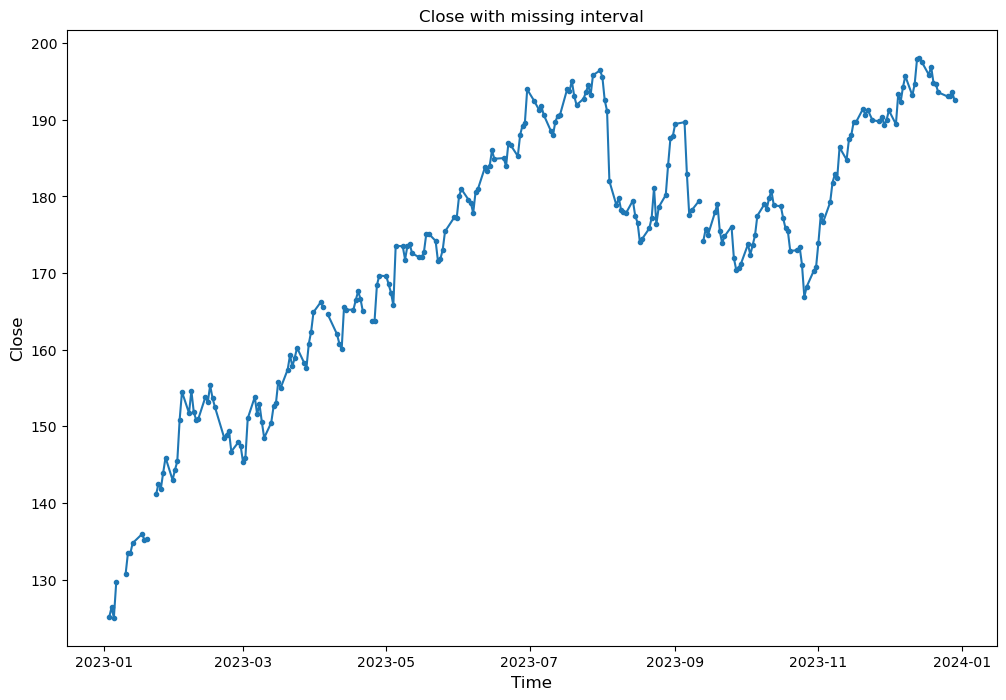

In [31]:
## Plot
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(df['Close'],'.-')


# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.title('Close with missing interval')

plt.show()

## Train Deep Neural Net

In [27]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers

In [33]:
features = ['Open','High','Low','Adj Close','Volume']
X = df.loc[:, features]
y = df.loc[:, ['Close']]

In [34]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 973)
for train_index, test_index in kf.split(X, y):

    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]

In [35]:
maxepo=800

dnn_model = tf.keras.Sequential([

  layers.Dense(16, activation='relu'), # first layer

  layers.Dense(8, activation='relu'),  # second layer
  
  layers.Dense(4, activation='relu'),  # third layer

  layers.Dense(1)

])

In [36]:
dnn_model.compile(

    optimizer=tf.optimizers.Adam(learning_rate=0.01),

    loss='mean_squared_error')

In [37]:
dnn_model.fit(

    X_train, y_train,

    validation_split=0,

    verbose=0, epochs=maxepo)
print(dnn_model.evaluate(X_test, y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
nan


In [40]:
prediction = dnn_model.predict(df.loc[missing_dates])
print(prediction)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 5, but received input with shape (5, 6)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(5, 6), dtype=float32)
  • training=False
  • mask=None

In [39]:

dnn_model.loc[missing_dates,['Close']] = np.nan
dnn_model.loc[missing_dates]

AttributeError: 'Sequential' object has no attribute 'loc'

In [ ]:
## Plot
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(df['Close'],'.-')

# Add points where data was imputed with red color

#plt.figure(figsize=(16,5))
plt.scatter(imputed_indices, df_imputed_LOCF.loc[imputed_indices, 'Adj Close'], color='red', label='Imputing data')
plt.scatter(imputed_indices, data.loc[imputed_indices, 'Adj Close'], color='green',label='True data')


# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.title('Close with Deep Neural Net imputed interval')

plt.show()

In [41]:
X_test.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2023-01-09,NaN,NaN,NaN,NaN,NaN
2023-01-17,134.830002,137.289993,134.130005,134.829239,63646600.0
2023-01-25,140.889999,142.429993,138.809998,140.700867,65799300.0
2023-01-31,142.699997,144.339996,142.279999,143.110992,65874500.0
2023-02-01,143.970001,146.610001,141.320007,144.241684,77663600.0


In [48]:
df.loc[missing_dates, ['Close']]

,Close
Date,
2023-01-09,NaN
2023-01-20,NaN
2023-04-05,NaN
2023-04-24,NaN
2023-09-12,NaN


In [45]:
df_md.shape

(5, 6)

In [47]:
dnn_model.shape

AttributeError: 'Sequential' object has no attribute 'shape'